In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
# from rdkit.Chem import Draw
# from rdkit.Chem import rdMolDescriptors
import sys
sys.path.append('/global/project/projectdirs/openmsi/jupyterhub_libs/anaconda/lib/python2.7/site-packages')

from rdkit import Chem
# from rdkit.Chem import AllChem
file = '/global/homes/b/bpb/notebooks/meta-iq/midas_lbl/MetaCyc.mdb'
import csv
reader = csv.DictReader(open(file, 'rb'), delimiter='\t')
mols = []
name = []
for row in reader:
    mols.append(Chem.MolFromInchi(row['InChI']))
    name.append(row['Name'])




In [2]:
from rdkit.Chem.Fingerprints import FingerprintMols
"""
- mol: the molecule to use

- minPath: (optional) minimum number of bonds to include in the subgraphs
  Defaults to 1.

- maxPath: (optional) maximum number of bonds to include in the subgraphs
  Defaults to 7.

- fpSize: (optional) number of bits in the fingerprint
  Defaults to 2048.

- nBitsPerHash: (optional) number of bits to set per path
  Defaults to 2.

- useHs: (optional) include paths involving Hs in the fingerprint if the molecule
  has explicit Hs.
  Defaults to True.

- tgtDensity: (optional) fold the fingerprint until this minimum density has
  been reached
  Defaults to 0.

- minSize: (optional) the minimum size the fingerprint will be folded to when
  trying to reach tgtDensity
  Defaults to 128.

- branchedPaths: (optional) if set both branched and unbranched paths will be
  used in the fingerprint.
  Defaults to True.

- useBondOrder: (optional) if set both bond orders will be used in the path hashes
  Defaults to True.

- atomInvariants: (optional) a sequence of atom invariants to use in the path hashes
  Defaults to empty.

- fromAtoms: (optional) a sequence of atom indices. If provided, only paths/subgraphs 
  starting from these atoms will be used.
  Defaults to empty.

- atomBits: (optional) an empty list. If provided, the result will contain a list 
  containing the bits each atom sets.
  Defaults to empty."""
N = 128
fps = [FingerprintMols.FingerprintMol(x,minPath=1,maxPath=7,fpSize=N,bitsPerHash=2,useHs=True,tgtDensity=0,minSize=N,branchedPaths=True,
                                     useBondOrder=True,atomInvariants=[],fromAtoms=[],atomBits=[]) for x in mols]

In [4]:
#alanine = 7604
# 6674 (<i>S</i>)-lactate
import numpy as np
from rdkit import DataStructs
# for i in range(9000):
#     if 'lactate' in name[i]:
#         print i,name[i]
fp_mat = np.zeros((len(fps),N))
for i,f in enumerate(fps):
    for j in range(N):
        fp_mat[i,j] = float(DataStructs.BitVectToText(fps[i])[j])

In [5]:
from minisom import MiniSom
from numpy import genfromtxt,array,linalg,zeros,mean,std,apply_along_axis

"""
    This script shows how to use MiniSom on the Iris dataset.
    In partucular it shows how to train MiniSom and how to visualize the result.
    ATTENTION: pylab is required for the visualization.        
"""

# reading the iris dataset in the csv format    
# (downloaded from http://aima.cs.berkeley.edu/data/iris.csv)
data = fp_mat
# data = apply_along_axis(lambda x: x/linalg.norm(x),1,data) # data normalization

### Initialization and training ###
som = MiniSom(30,30,N,sigma=1.0,learning_rate=0.5)
# som.random_weights_init(data)

(26, 18)


In [6]:

print("Training...")
som.train_batch(data,1000) # random training
print("\n...ready!")





Training...

...ready!


In [110]:
print("Getting Coordinates")
x = []
y = []
for cnt,xx in enumerate(name):
    w = som.winner(data[cnt,:]) # getting the winner
    x.append(w[0]+0.5)
    y.append(w[1]+0.5)


Getting Coordinates


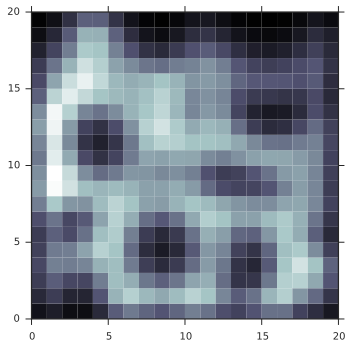

In [109]:
### Plotting the response for each pattern in the iris dataset ###
from pylab import plot,axis,show,pcolor,colorbar,bone,axes
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
# colorbar()
# target = genfromtxt('iris.csv',delimiter=',',usecols=(4),dtype=str) # loading the labels
# t = zeros(len(target),dtype=int)
# t[target == 'setosa'] = 0
# t[target == 'versicolor'] = 1
# t[target == 'virginica'] = 2
# use different colors and markers for each label
# markers = ['o','s','D']
# colors = ['r','g','b']
# for cnt,xx in enumerate(name):
#     w = som.winner(data[cnt,:]) # getting the winner
#  palce a marker on the winning position for the sample xx
#     plot(w[0]+0.5,w[1]+0.5,'r.')
#     markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)
axis([0,som.weights.shape[0],0,som.weights.shape[1]])
axes().set_aspect('equal')

show() # show the figure

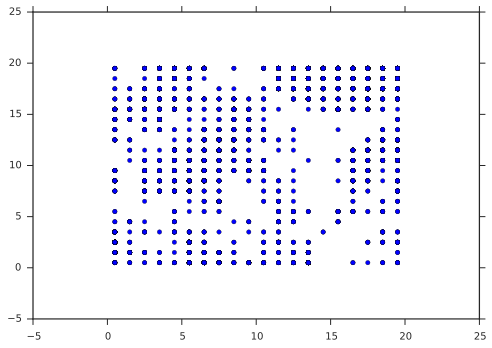

In [111]:
from matplotlib import pylab as plt

plt.scatter(x,y)
plt.show()

In [ ]:
import seaborn as sns; sns.set()
# uniform_data = np.random.rand(10, 12)
# ax = sns.heatmap(som.distance_map().T)

# ax = sns.kdeplot(np.asarray(x), np.asarray(y), n_levels=30, cmap="Purples_d")
# import numpy as np
# import seaborn as sns
sns.set(style="ticks")
sns.jointplot(np.asarray(x), np.asarray(y), kind="hex", color="#4CB391")